In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
import spacy
import matplotlib
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from pprint import pprint
from collections import Counter
import string
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
import spacy
import matplotlib
 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Dropout, LSTM
 
from keras.preprocessing.sequence import pad_sequences
 
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping
 
from sklearn.model_selection import KFold
 
 
%matplotlib inline

In [ ]:
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wr2DC3jRIwtmd-_kt-kbskDNgFHL0RBS' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=154yVk9HaQI1hxZorjZlJUQtGpPba5Cfn" -O emotion.csv && rm -rf /tmp/cookies.txt


In [ ]:
df = pd.read_csv("emotion.csv")
df.head(10)

,Unnamed: 0,text,emotions
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love
5,18231,i find myself frustrated with christians becau...,love
6,10714,i am one of those people who feels like going ...,joy
7,35177,i feel especially pleased about this as this h...,joy
8,122177,i was struggling with these awful feelings and...,joy
9,26723,i feel so enraged but helpless at the same time,anger


In [ ]:
len(df)

416809

In [ ]:
len(df)

416809

In [ ]:
value_count = df['emotions'].value_counts()
value_count

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

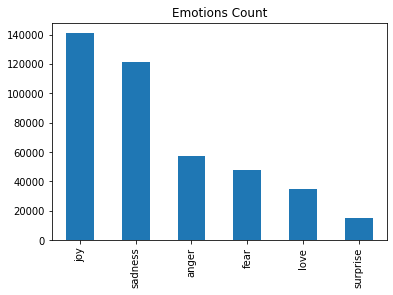

In [ ]:
value_count.plot(kind='bar', title = 'Emotions Count')

In [ ]:
uno = df.loc[df['emotions'] == 'joy']
due = df.loc[df['emotions'] == 'sadness']
tre = df.loc[df['emotions'] == 'anger']
quattro = df.loc[df['emotions'] == 'fear']
cinque = df.loc[df['emotions'] == 'love']
sei = df.loc[df['emotions'] == 'surprise']

df2=pd.concat([uno[1:14972],due[1:14972],tre[1:14972],quattro[1:14972],cinque[1:14972],sei[1:14972]])

arr = np.arange(len(df2))
out = np.random.permutation(arr) # random shuffle

df2=df2.iloc[out]
df3=df
df=df2

### Convert from dataframe to list

In [ ]:
len(df)

89826

In [ ]:
sentence_list = [t for t in df['text'].to_list()]
tag_list = [e for e in df['emotions'].to_list()]

#### The input sentences.

In [ ]:
sentence_list[:2]

['i knew being around negative people made it difficult to feel optimistic and happy but now i know that emotional vampires inflict deeper wounds',
 'i could remember i never spent time with friends during the summer that much i always seem to feel like a loner which is weird because if you know me i am very outgoing and love people']

In [ ]:
tag_list[:2]

['joy', 'surprise']

In [ ]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
new_sentence=[spacy_tokenizer(sentence) for sentence in sentence_list]

In [ ]:
cv=CountVectorizer()
word_count_vector=cv.fit_transform(sentence_list)

In [ ]:
word_count_vector.shape

(89826, 36360)

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
feel,1.430587
and,1.817744
to,1.923912
the,2.017815
feeling,2.144864
...,...
jabip,11.712494
jabel,11.712494
jabbing,11.712494
jacuzzi,11.712494


In [ ]:
df_idf.to_csv('df_idf.csv')

In [ ]:
words = []
for sentence in sentence_list:
    for w in sentence.split():
        words.append(w)
    
words = list(set(words))
print(f"Size of word-vocablury: {len(words)}\n")

Size of word-vocablury: 36386



In [ ]:
words

['orchant',
 'een',
 'madly',
 'krill',
 'droplets',
 'geting',
 'pretzel',
 'unassuming',
 'wring',
 'told',
 'personalized',
 'adjectives',
 'akari',
 'feelingpublished',
 'peripheral',
 'repurchasing',
 'elections',
 'roland',
 'graded',
 'gtfo',
 'grab',
 'producer',
 'acomplished',
 'fanned',
 'yearn',
 'cleans',
 'tigers',
 'wisdom',
 'disposable',
 'brethren',
 'garlanded',
 'acmes',
 'braces',
 'greeks',
 'acknowledgements',
 'torment',
 'reflected',
 'perfected',
 'champion',
 'sweet',
 'ideology',
 'chennai',
 'bralets',
 'prickish',
 'wrangle',
 'manya',
 'carnaval',
 'barrett',
 'fisa',
 'vball',
 'pretends',
 'corral',
 'linda',
 'stayviolation',
 'hammered',
 'recovered',
 'hasard',
 'joys',
 'cbj',
 'vista',
 'statistics',
 'rundown',
 'enroll',
 'sinai',
 'yelps',
 'booster',
 'tracks',
 'nuclear',
 'streaky',
 'hillarys',
 'displeased',
 'smiles',
 'lattice',
 'ensues',
 'strand',
 'albini',
 'merk',
 'bluntly',
 'rosendorfer',
 'js',
 'handbasket',
 'strep',
 'ganged'

In [ ]:
value_count = df['emotions'].value_counts()
value_count

joy         14971
fear        14971
anger       14971
love        14971
surprise    14971
sadness     14971
Name: emotions, dtype: int64

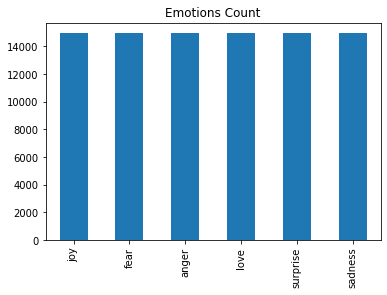

In [ ]:
value_count.plot(kind='bar', title = 'Emotions Count')

In [ ]:
word2idx=dict(dict(df_idf)['idf_weights'])

In [ ]:
word2idx

{'aa': 11.307028588582018,
 'aaa': 11.019346516130238,
 'aaaa': 11.712493696690183,
 'aaaaaaaaaaaaaaarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggggggghhhhhhhhhhhhhh': 11.712493696690183,
 'aaaaaand': 11.712493696690183,
 'aaaaahhhhhh': 11.712493696690183,
 'aaaaall': 11.307028588582018,
 'aaah': 11.712493696690183,
 'aaargh': 11.712493696690183,
 'aaawesome': 11.712493696690183,
 'aac': 11.712493696690183,
 'aacc': 11.712493696690183,
 'aad': 11.712493696690183,
 'aadmi': 11.712493696690183,
 'aah': 11.712493696690183,
 'aahhh': 11.712493696690183,
 'aajao': 11.712493696690183,
 'aakhri': 11.712493696690183,
 'aam': 11.712493696690183,
 'aaradhya': 11.712493696690183,
 'aardvarkartglass': 11.712493696690183,
 'aaron': 10.103055784256082,
 'aarons': 11.307028588582018,
 'aarthi': 11.712493696690183,
 'aate': 11.712493696690183,
 'ab': 10.613881408022074,
 'aback': 10.208416299913909,
 'abah': 11.712493696690183,
 'abandon': 9.920734227462129,
 'abandoned': 9.147544339228647

In [ ]:
tags = []
for tag in tag_list:
    tags.append(tag)
tags = list(set(tags))
print(f"Size of tag-vocab: {len(tags)}\n")
print(tags)

Size of tag-vocab: 6

['joy', 'surprise', 'love', 'anger', 'sadness', 'fear']


In [ ]:
tag2idx = {word: i for i, word in enumerate(tags)}
print(tag2idx)

{'joy': 0, 'surprise': 1, 'love': 2, 'anger': 3, 'sadness': 4, 'fear': 5}


In [ ]:
sentence_list = [' '.join(y for y in x if len(y) > 1 ) for x in new_sentence]


In [ ]:
sentence_list[:10]

['knew negative people difficult feel optimistic happy know emotional vampires inflict deeper wounds',
 'remember spent time friends summer feel like loner weird know outgoing love people',
 'outspoken feel job supportive',
 'feel overwhelmed fellows',
 'assert better feel rich actually rich',
 'feeling strange happening',
 'feel awkward',
 'feeling little apprehensive knee',
 'speak loud maybe know friends people classmate friends mean ill feel offended',
 'feeling free boat anchor']

In [ ]:
X = [[word2idx[w] for w in s.split(' ') if w in word2idx.keys()] for s in sentence_list]

In [ ]:
X

[[6.27224283425348,
  7.449813819648868,
  4.1451480206769435,
  7.287647064833373,
  1.4305868318680863,
  7.336736675029897,
  5.455784422249356,
  3.9017355801608264,
  6.522318488761849,
  10.459730728194815,
  10.796202964816027,
  8.311296315028027,
  9.633052155010347],
 [5.2620232745460065,
  6.685329100642717,
  4.034167340183297,
  5.369492383499592,
  6.833486845072364,
  1.4305868318680863,
  2.824910050449272,
  10.326199335570292,
  4.840365595351197,
  3.9017355801608264,
  8.262506150858595,
  4.536239164673039,
  4.1451480206769435],
 [10.613881408022074,
  1.4305868318680863,
  6.1712301515317565,
  6.221491986312645],
 [1.4305868318680863, 4.829031110277091, 10.613881408022074],
 [11.307028588582018,
  5.5954984271349915,
  1.4305868318680863,
  7.2016341901733325,
  5.292498768543041,
  7.2016341901733325],
 [2.1448635698102674, 4.868743747683958, 7.2016341901733325],
 [1.4305868318680863, 6.818392218849879],
 [2.1448635698102674, 3.986501626309279, 6.33490314924763

In [ ]:
len(word2idx)

36360

In [ ]:
len(set(list(word2idx.values())))

758

In [ ]:
word2idx

{'aa': 11.307028588582018,
 'aaa': 11.019346516130238,
 'aaaa': 11.712493696690183,
 'aaaaaaaaaaaaaaarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggggggghhhhhhhhhhhhhh': 11.712493696690183,
 'aaaaaand': 11.712493696690183,
 'aaaaahhhhhh': 11.712493696690183,
 'aaaaall': 11.307028588582018,
 'aaah': 11.712493696690183,
 'aaargh': 11.712493696690183,
 'aaawesome': 11.712493696690183,
 'aac': 11.712493696690183,
 'aacc': 11.712493696690183,
 'aad': 11.712493696690183,
 'aadmi': 11.712493696690183,
 'aah': 11.712493696690183,
 'aahhh': 11.712493696690183,
 'aajao': 11.712493696690183,
 'aakhri': 11.712493696690183,
 'aam': 11.712493696690183,
 'aaradhya': 11.712493696690183,
 'aardvarkartglass': 11.712493696690183,
 'aaron': 10.103055784256082,
 'aarons': 11.307028588582018,
 'aarthi': 11.712493696690183,
 'aate': 11.712493696690183,
 'ab': 10.613881408022074,
 'aback': 10.208416299913909,
 'abah': 11.712493696690183,
 'abandon': 9.920734227462129,
 'abandoned': 9.147544339228647

In [ ]:
y = [tag2idx[t] for t in tag_list]
y[:3]

[0, 1, 2]

In [ ]:
features = np.zeros((len(X), 30), dtype='float64')

In [ ]:
for i, row in enumerate(X):
    if len(row) > 0:
        features[i][-len(row):] = row[:30]

In [ ]:
features

array([[ 0.        ,  0.        ,  0.        , ..., 10.79620296,
         8.31129632,  9.63305216],
       [ 0.        ,  0.        ,  0.        , ...,  8.26250615,
         4.53623916,  4.14514802],
       [ 0.        ,  0.        ,  0.        , ...,  1.43058683,
         6.17123015,  6.22149199],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  7.714293  ,
         1.43058683,  7.93973276],
       [ 0.        ,  0.        ,  0.        , ...,  6.53071015,
         9.22758705,  8.55549328],
       [ 0.        ,  0.        ,  0.        , ...,  5.30726524,
         5.73741263,  9.22758705]])

In [ ]:
#X_train, y_train = features[0:int(len(X)*0.7)], y[0:int(len(X)*0.7)]
X_test, y_test = features[int(len(X)*0.7+1):], y[int(len(X)*0.7+1):]
X_train, y_train = features, y

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train.shape, len(y_train)

((89826, 30), 89826)

In [ ]:
num_words=len(word2idx)

In [ ]:
maxlen=30

X_train = pad_sequences(X_train, maxlen = maxlen)
#X_test = pad_sequences(X_test, maxlen = maxlen)

In [ ]:
acc_per_fold = []
loss_per_fold = []
kfold = KFold(n_splits=10, shuffle=True)
fold_no = 1
for train, test in kfold.split(X_train, y_train):
  model = Sequential()
  model.add(Embedding(num_words, 20, input_length=30))
  model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=3, strides=1))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=4, strides=1))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=5, strides=1))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(6, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_accuracy', 'binary_accuracy']) #optimizer adam se solo cnn o rmsprop se con lstm
  earlystopping= EarlyStopping(min_delta=0.001, patience=10)
  history = model.fit(X_train[train], y_train[train], batch_size=64,  epochs=50, callbacks=[earlystopping], validation_split=0.2)
  scores = model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

Epoch 1/50
1011/1011 [==============================] - 15s 14ms/step - loss: 1.6292 - accuracy: 0.3079 - categorical_accuracy: 0.3079 - binary_accuracy: 0.6353 - val_loss: 1.5647 - val_accuracy: 0.3371 - val_categorical_accuracy: 0.3371 - val_binary_accuracy: 0.6794
Epoch 2/50
1011/1011 [==============================] - 14s 14ms/step - loss: 1.5715 - accuracy: 0.3363 - categorical_accuracy: 0.3363 - binary_accuracy: 0.6632 - val_loss: 1.5546 - val_accuracy: 0.3385 - val_categorical_accuracy: 0.3385 - val_binary_accuracy: 0.6769
Epoch 3/50
1011/1011 [==============================] - 14s 14ms/step - loss: 1.5626 - accuracy: 0.3398 - categorical_accuracy: 0.3398 - binary_accuracy: 0.6607 - val_loss: 1.5482 - val_accuracy: 0.3406 - val_categorical_accuracy: 0.3406 - val_binary_accuracy: 0.6904
Epoch 4/50
1011/1011 [==============================] - 14s 14ms/step - loss: 1.5574 - accuracy: 0.3409 - categorical_accuracy: 0.3409 - binary_accuracy: 0.6613 - val_loss: 1.5508 - val_accuracy: 

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.5420160293579102 - Accuracy: 35.333406925201416%
------------------------------------------------------------------------
> Fold 2 - Loss: 1.5421464443206787 - Accuracy: 34.64321494102478%
------------------------------------------------------------------------
> Fold 3 - Loss: 1.5517033338546753 - Accuracy: 34.69887673854828%
------------------------------------------------------------------------
> Fold 4 - Loss: 1.5516868829727173 - Accuracy: 35.64510643482208%
------------------------------------------------------------------------
> Fold 5 - Loss: 1.5457698106765747 - Accuracy: 34.29811894893646%
------------------------------------------------------------------------
> Fold 6 - Loss: 1.5424296855926514 - Accuracy: 35.244351625442505%
----------------------------------------------------------------------

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(X_train[test], 64, verbose=0)

In [ ]:
y_test_bis = np.argmax(y_train[test], axis=1) 
y_test_bis

array([4, 2, 4, ..., 0, 0, 1])

In [ ]:
conf = confusion_matrix(y_test_bis, y_pred)


In [ ]:
conf

array([[ 404,  218,  153,  375,  258,   83],
       [  72, 1104,  276,   43,   66,   30],
       [ 128,  522,  384,   76,  286,   82],
       [ 317,  190,  136,  476,  277,   95],
       [ 118,  253,  154,  122,  646,  195],
       [  83,  397,  146,  104,  543,  170]])

In [ ]:
model.save('modelkeras.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: modelkeras.model/assets


In [ ]:
!zip -r /content/model.zip /content/modelkeras.model/

  adding: content/modelkeras.model/ (stored 0%)
  adding: content/modelkeras.model/variables/ (stored 0%)
  adding: content/modelkeras.model/variables/variables.index (deflated 66%)
  adding: content/modelkeras.model/variables/variables.data-00000-of-00001 (deflated 45%)
  adding: content/modelkeras.model/assets/ (stored 0%)
  adding: content/modelkeras.model/saved_model.pb (deflated 89%)


In [ ]:
print(1050/1528)
print(506/1460)
print(55/1490)
print(341/1554)
print(824/1453)
print(366/1497)

0.68717277486911
0.34657534246575344
0.03691275167785235
0.21943371943371942
0.5671025464556091
0.24448897795591182


In [ ]:
(0.69+0.35+0.04+0.22+0.57+0.24) /6

0.35166666666666674

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


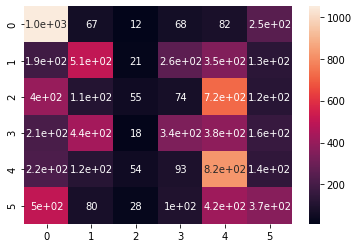

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)

In [ ]:
count_y_test_label=Counter(y_test_bis)

In [ ]:
93/1541

0.06035042180402336

In [ ]:
264/1506

0.1752988047808765

In [ ]:
293/1463

0.20027341079972658

In [ ]:
conf

array([[1050,   67,   12,   68,   82,  249],
       [ 187,  506,   21,  263,  351,  132],
       [ 402,  110,   55,   74,  724,  125],
       [ 214,  435,   18,  341,  382,  164],
       [ 219,  120,   54,   93,  824,  143],
       [ 503,   80,   28,  100,  420,  366]])

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_train[test], 64, verbose=0)

y_pred_test_bool = np.argmax(y_train[test], axis=1)
print(classification_report(y_pred_test_bool, y_pred_bool))

              precision    recall  f1-score   support

           0       0.41      0.69      0.51      1528
           1       0.38      0.35      0.36      1460
           2       0.29      0.04      0.07      1490
           3       0.36      0.22      0.27      1554
           4       0.30      0.57      0.39      1453
           5       0.31      0.24      0.27      1497

    accuracy                           0.35      8982
   macro avg       0.34      0.35      0.31      8982
weighted avg       0.34      0.35      0.31      8982



In [ ]:
y_train[test]

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred

array([5, 1, 0, ..., 5, 0, 1])

In [ ]:
model.save('/content/model.h5')